# <center> TP-SD205 Splines
### Authors: Rémi LELUC, François PORTIER
### Date: Wednesday, March 24th 2021

### Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Load data

In [3]:
col_names = ['ID','times','accel']
data = pd.read_csv(filepath_or_buffer='Motorcycledata.txt',header=None,sep='\s+',names=col_names)
print('data shape: ',data.shape)
data.head(12)

data shape:  (133, 3)


,ID,times,accel
0,1,2.4,0.0
1,2,2.6,-1.3
2,3,3.2,-2.7
3,4,3.6,0.0
4,5,4.0,-2.7
5,6,6.2,-2.7
6,7,6.6,-2.7
7,8,6.8,-1.3
8,9,7.8,-2.7
9,10,8.2,-2.7


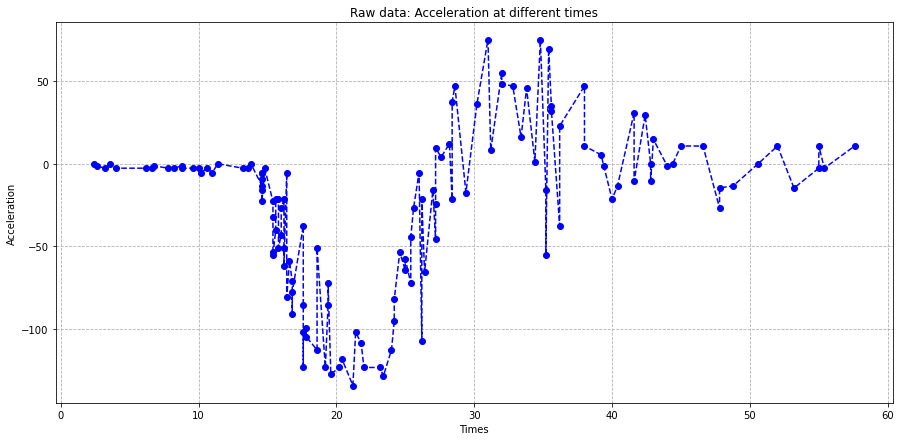

In [4]:
# Display raw data
plt.figure(figsize=(15,7))
plt.plot(data['times'],data['accel'],linestyle='--', marker='o', color='b')
plt.title('Raw data: Acceleration at different times')
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.grid(linestyle='--')
plt.show()

### Reduction to distinct times

In [5]:
unique_times,unique_index = np.unique(ar=data['times'],return_index=True)
n = len(unique_index)
print('Number of time steps    :',len(data['times']))
print('Number of Distinct times:',n)
print(unique_times)

Number of time steps    : 133
Number of Distinct times: 94
[ 2.4  2.6  3.2  3.6  4.   6.2  6.6  6.8  7.8  8.2  8.8  9.6 10.  10.2
 10.6 11.  11.4 13.2 13.6 13.8 14.6 14.8 15.4 15.6 15.8 16.  16.2 16.4
 16.6 16.8 17.6 17.8 18.6 19.2 19.4 19.6 20.2 20.4 21.2 21.4 21.8 22.
 23.2 23.4 24.  24.2 24.6 25.  25.4 25.6 26.  26.2 26.4 27.  27.2 27.6
 28.2 28.4 28.6 29.4 30.2 31.  31.2 32.  32.8 33.4 33.8 34.4 34.8 35.2
 35.4 35.6 36.2 38.  39.2 39.4 40.  40.4 41.6 42.4 42.8 43.  44.  44.4
 45.  46.6 47.8 48.8 50.6 52.  53.2 55.  55.4 57.6]


In [6]:
# Compute mean of acceleration for same time steps
new_accel = np.zeros(n)
weights = np.zeros(n)
for i in range(n):
    new_accel[i] = (data['accel'][data['times']==unique_times[i]]).mean()
    weights[i] = (data['accel'][data['times']==unique_times[i]]).count()
new_data = np.array([unique_index,unique_times,new_accel]).T
df = pd.DataFrame(data=new_data,columns = ['ID','time','accel'])
df.head(12)

,ID,time,accel
0,0.0,2.4,0.0
1,1.0,2.6,-1.3
2,2.0,3.2,-2.7
3,3.0,3.6,0.0
4,4.0,4.0,-2.7
5,5.0,6.2,-2.7
6,6.0,6.6,-2.7
7,7.0,6.8,-1.3
8,8.0,7.8,-2.7
9,9.0,8.2,-2.7


In [7]:
print(weights)
W = np.diag(weights)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 6. 1. 4. 2.
 2. 2. 3. 2. 1. 3. 4. 2. 2. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2.
 2. 1. 1. 2. 1. 1. 3. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 2. 1. 2.
 2. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 2. 1. 1.]


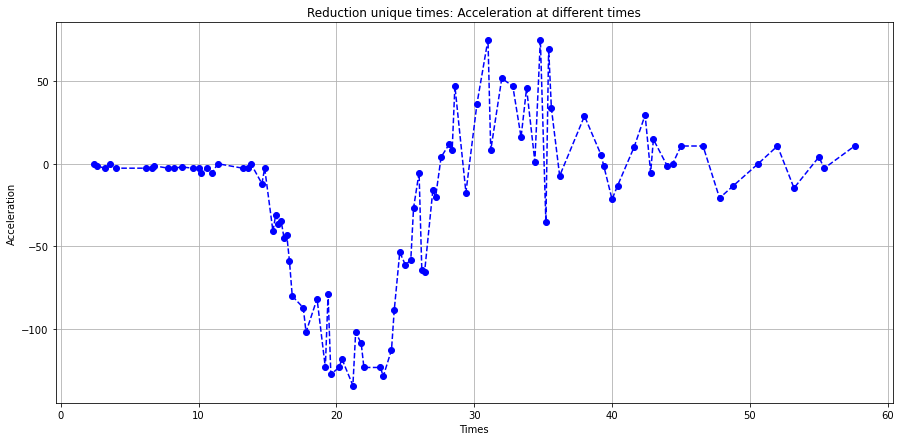

In [8]:
# Display reduced data
plt.figure(figsize=(15,7))
plt.plot(df['time'],df['accel'],linestyle='--', marker='o', color='b')
plt.title('Reduction unique times: Acceleration at different times')
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.grid()
plt.show()

### Polynomial Regression

In [9]:
# data
X = np.array(df['time']).reshape(-1,1)
y = df['accel']
# polynomial regression of degree 3
polynomial_features_3 = PolynomialFeatures(degree=3)
x_poly_3 = polynomial_features_3.fit_transform(X)
model1 = LinearRegression()
model1.fit(x_poly_3, y)
# polynomial regression of degree 6
polynomial_features_6 = PolynomialFeatures(degree=6)
x_poly_6 = polynomial_features_6.fit_transform(X)
model2 = LinearRegression()
model2.fit(x_poly_6, y)
# polynomial regression of degree 10
polynomial_features_10 = PolynomialFeatures(degree=10)
x_poly_10 = polynomial_features_10.fit_transform(X)
model3 = LinearRegression()
model3.fit(x_poly_10, y)
# polynomial regression of degree 15
polynomial_features_15 = PolynomialFeatures(degree=15)
x_poly_15 = polynomial_features_15.fit_transform(X)
model4 = LinearRegression()
model4.fit(x_poly_15, y)

# Prediction
y1 = model1.predict(X=x_poly_3)
y2 = model2.predict(X=x_poly_6)
y3 = model3.predict(X=x_poly_10)
y4 = model4.predict(X=x_poly_15)

# RMSE and R2 scores
rmse1 = np.sqrt(mean_squared_error(y_true=y,y_pred=y1)).round(3)
rmse2 = np.sqrt(mean_squared_error(y_true=y,y_pred=y2)).round(3)
rmse3 = np.sqrt(mean_squared_error(y_true=y,y_pred=y3)).round(3)
rmse4 = np.sqrt(mean_squared_error(y_true=y,y_pred=y4)).round(3)

# R2 scores
r2_1 = r2_score(y_true=y,y_pred=y1).round(3)
r2_2 = r2_score(y_true=y,y_pred=y2).round(3)
r2_3 = r2_score(y_true=y,y_pred=y3).round(3)
r2_4 = r2_score(y_true=y,y_pred=y4).round(3)

print('Poly Reg: d=3 | d=6 | d=10 | d=15')
print('RMSE:',rmse1,'|',rmse2,'|',rmse3,'|',rmse4)
print('R2:',r2_1,'|',r2_2,'|',r2_3,'|',r2_4)

Poly Reg: d=3 | d=6 | d=10 | d=15
RMSE: 39.9 | 30.973 | 23.967 | 34.664
R2: 0.34 | 0.602 | 0.762 | 0.502


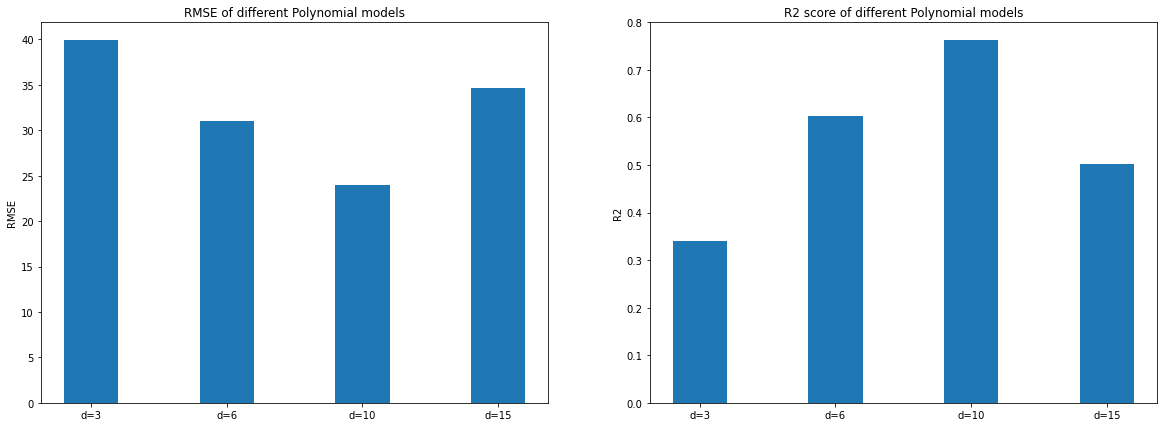

In [10]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.bar(x=np.arange(4),height=[rmse1,rmse2,rmse3,rmse4],width=0.4)
plt.title('RMSE of different Polynomial models')
plt.xticks(ticks = [0,1,2,3],labels=['d=3','d=6','d=10','d=15'])
plt.ylabel('RMSE')

plt.subplot(1,2,2)
plt.bar(x=np.arange(4),height=[r2_1,r2_2,r2_3,r2_4],width=0.4)
plt.title('R2 score of different Polynomial models')
plt.xticks(ticks = [0,1,2,3],labels=['d=3','d=6','d=10','d=15'])
plt.ylabel('R2')

plt.show()

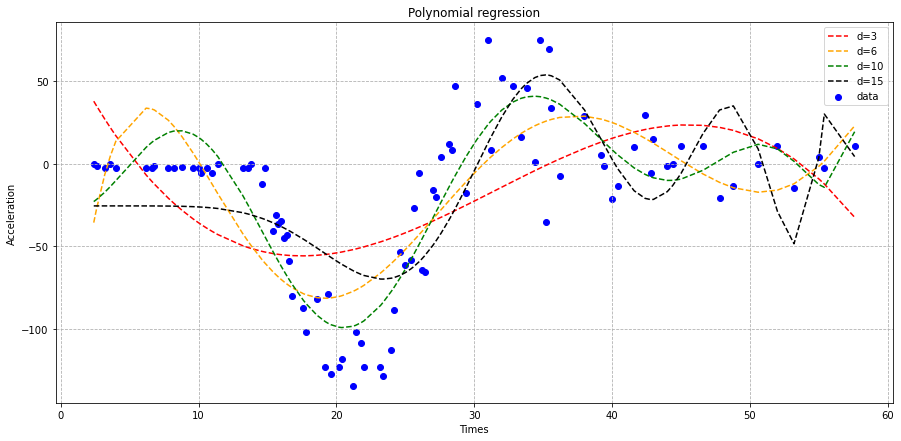

In [11]:
# Display 
plt.figure(figsize=(15,7))
plt.scatter(X,y,label='data', marker='o', color='b')
plt.plot(X,y1,label='d=3',linestyle='--', color='r')
plt.plot(X,y2,label='d=6',linestyle='--', color='orange')
plt.plot(X,y3,label='d=10',linestyle='--', color='g')
plt.plot(X,y4,label='d=15',linestyle='--', color='k')
plt.title('Polynomial regression')
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(linestyle='--')
plt.show()

### Splines regression

In [12]:
# Initialize vector h, matrices Q and R
I = np.eye(n)
h = np.diff(X.ravel())
Q = np.zeros((n,n-2))
R = np.zeros((n-2,n-2))
# Fill matrix Q
for j in range(n-2):
    Q[j:j+3,j] = np.array([[1/h[j]],[-1/h[j]-1/h[j+1]],[1/h[j+1]]]).ravel()
# Fill matrix R
for j in range(n-3):
    R[j,j] = (h[j-1]+h[j])/3
    R[j,j+1] = h[j]/6
    R[j+1,j] = h[j]/6
R[n-3,n-3] = (h[n-3]+h[n-2])/3
# Compute matrix K
K = Q@np.linalg.inv(R)@Q.T

In [13]:
# Compute splines
alphas = [10,20,30]
ghat = np.zeros((n,3))
for k in range(3):
    #ghat[:,k] = np.linalg.solve(a=(I+alphas[k]*K),b=y) # no weights
    ghat[:,k] = np.linalg.solve(a=(W+alphas[k]*K),b=W@y)# weighted
g1 = ghat[:,0]
g2 = ghat[:,1]
g3 = ghat[:,2]

# RMSE and R2 scores
rmse10 = np.sqrt(mean_squared_error(y_true=y,y_pred=g1)).round(3)
rmse20 = np.sqrt(mean_squared_error(y_true=y,y_pred=g2)).round(3)
rmse30 = np.sqrt(mean_squared_error(y_true=y,y_pred=g3)).round(3)
# R2 scores
r2_10 = r2_score(y_true=y,y_pred=g1).round(3)
r2_20 = r2_score(y_true=y,y_pred=g2).round(3)
r2_30 = r2_score(y_true=y,y_pred=g3).round(3)

print('Poly Reg: d=3 | d=6 | d=10 | d=15')
print('RMSE:',rmse1,'|',rmse2,'|',rmse3,'|',rmse4)
print('R2:',r2_1,'|',r2_2,'|',r2_3,'|',r2_4)

print('Splines Reg: a=10 | a=20 | a=30')
print('RMSE:',rmse10,'|',rmse20,'|',rmse30)
print('R2:',r2_10,'|',r2_20,'|',r2_30)

Poly Reg: d=3 | d=6 | d=10 | d=15
RMSE: 39.9 | 30.973 | 23.967 | 34.664
R2: 0.34 | 0.602 | 0.762 | 0.502
Splines Reg: a=10 | a=20 | a=30
RMSE: 17.524 | 17.871 | 18.212
R2: 0.873 | 0.868 | 0.862


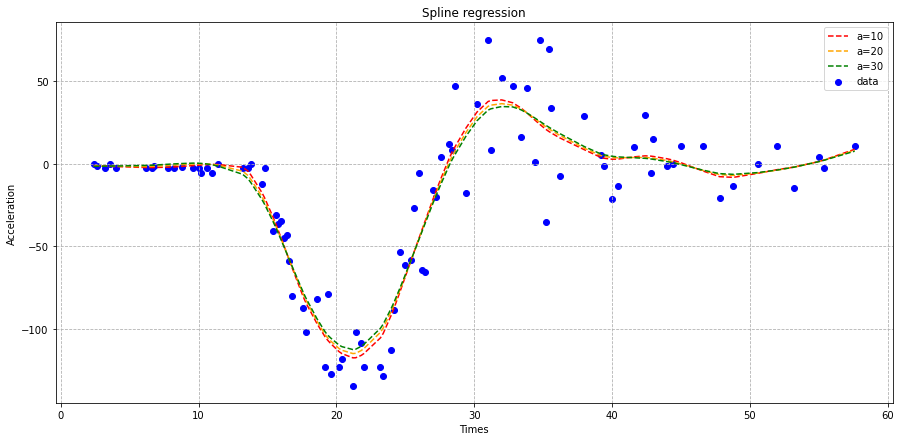

In [14]:
plt.figure(figsize=(15,7))
plt.scatter(X,y,label='data', marker='o', color='b')
plt.plot(X,g1,label='a=10',linestyle='--', color='r')
plt.plot(X,g2,label='a=20',linestyle='--', color='orange')
plt.plot(X,g3,label='a=30',linestyle='--', color='g')
plt.title('Spline regression')
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(linestyle='--')
plt.show()

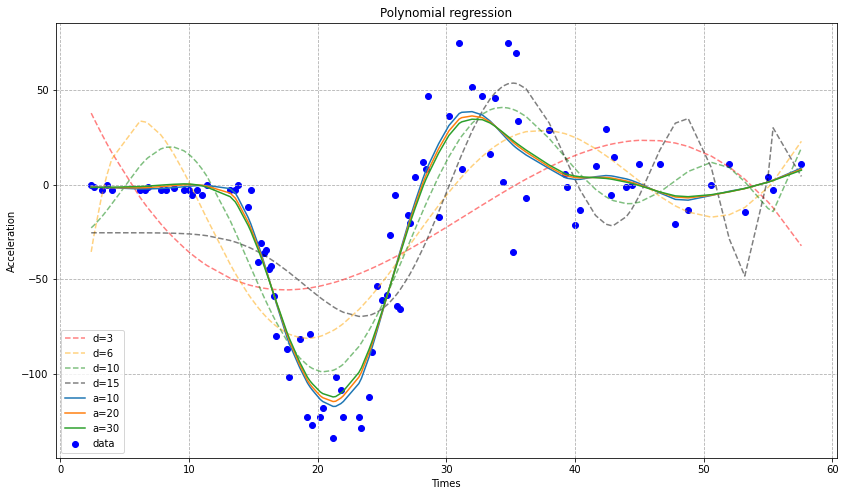

In [15]:
# Display 
plt.figure(figsize=(14,8))
plt.scatter(X,y,label='data', marker='o', color='b')
plt.plot(X,y1,label='d=3',linestyle='--', color='r',alpha=0.5)
plt.plot(X,y2,label='d=6',linestyle='--', color='orange',alpha=0.5)
plt.plot(X,y3,label='d=10',linestyle='--', color='g',alpha=0.5)
plt.plot(X,y4,label='d=15',linestyle='--', color='k',alpha=0.5)
plt.plot(X,g1,label='a=10',linestyle='-')
plt.plot(X,g2,label='a=20',linestyle='-')
plt.plot(X,g3,label='a=30',linestyle='-')
plt.title('Polynomial regression')
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(linestyle='--')
plt.show()

### Cross-validation 

best alpha_cv: 15


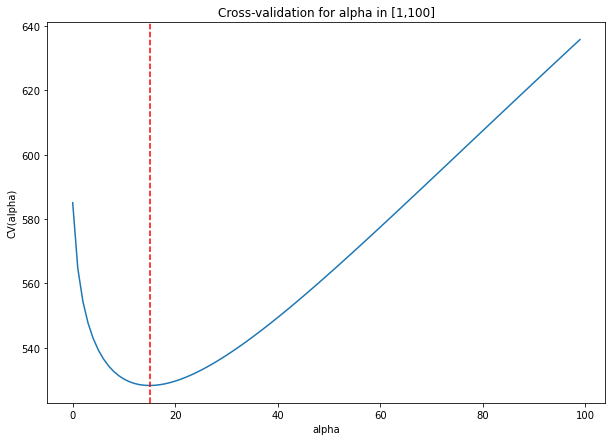

In [16]:
# Grid for cross-validation
alphas = np.arange(1,101)
cv = []
for k in range(100):
    #A = np.linalg.solve(a=(I+alphas[k]*K),b=I)
    A = np.linalg.solve(a=(W+alphas[k]*K),b=W)
    ghat = np.dot(A,y)
    # compute score for current alpha
    #cv_alpha = sum(((y-ghat)/(np.ones(n)-np.diagonal(A)))**2)/n        # no weights
    cv_alpha = sum(weights*((y-ghat)/(np.ones(n)-np.diagonal(A)))**2)/n # weighted
    cv.append(cv_alpha)
# best alpha value
best_alpha_cv = np.argmin(cv)
print('best alpha_cv:',best_alpha_cv)
# plot result
plt.figure(figsize=(10,7))
plt.plot(cv)
plt.axvline(x=best_alpha_cv,linestyle='--',color='r')
plt.title('Cross-validation for alpha in [1,100]')
plt.xlabel('alpha')
plt.ylabel('CV(alpha)')
plt.show()

### Generalized cross-validation

best alpha_gcv: 4


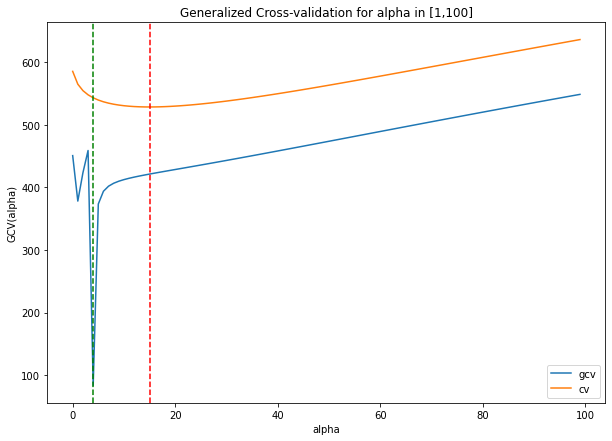

In [17]:
# Grid for cross-validation
alphas = np.arange(1,101)
gcv = []
#w = np.linalg.eigvalsh(K)
w = np.linalg.eigvalsh(np.diag(1/weights)@K)
def f(x):
    return n*(1-(sum(1/(1+x*w))/n))**2
for k in range(100):
    #A = np.linalg.solve(a=(I+alphas[k]*K),b=I)
    A = np.linalg.solve(a=(W+alphas[k]*K),b=W)
    ghat = np.dot(A,y)
    # compute score for current alpha
    #gcv_alpha = sum((y-ghat)**2)/(f(alphas[k])) # no weights
    gcv_alpha = sum(weights*(y-ghat)**2)/(f(alphas[k])) # weighted
    gcv.append(gcv_alpha)
# best alpha value
best_alpha_gcv=np.argmin(gcv)
print('best alpha_gcv:',best_alpha_gcv)
# plot result
plt.figure(figsize=(10,7))
plt.plot(gcv,label='gcv')
plt.plot(cv,label='cv')
plt.axvline(x=best_alpha_cv,linestyle='--',color='r')
plt.axvline(x=best_alpha_gcv,linestyle='--',color='g')
plt.title('Generalized Cross-validation for alpha in [1,100]')
plt.xlabel('alpha')
plt.ylabel('GCV(alpha)')
plt.legend()
plt.show()

### Polynomial vs. Spline regression

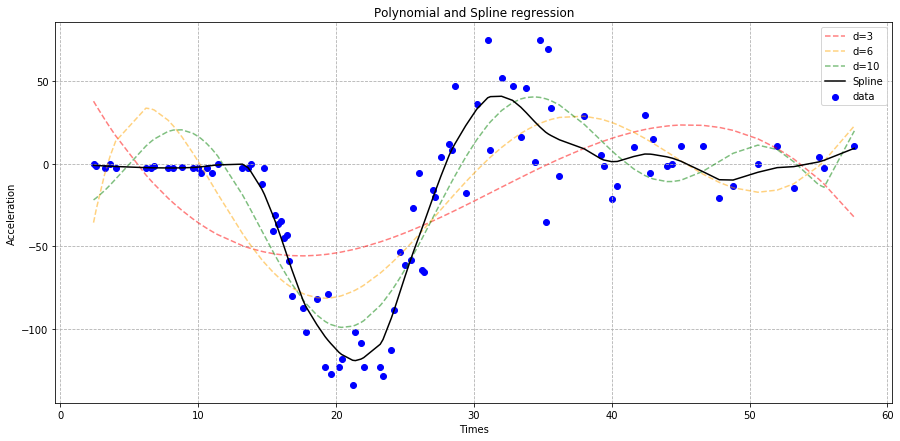

In [18]:
#g = np.linalg.solve(a=(I+best_alpha_gcv*K),b=y)
g = np.linalg.solve(a=(W+best_alpha_gcv*K),b=W@y)
plt.figure(figsize=(15,7))
plt.scatter(X,y,label='data', marker='o', color='b')
plt.plot(X,y1,label='d=3',linestyle='--', color='r',alpha=0.5)
plt.plot(X,y2,label='d=6',linestyle='--', color='orange',alpha=0.5)
plt.plot(X,y3,label='d=10',linestyle='--', color='g',alpha=0.5)
plt.plot(X,g,label='Spline',linestyle='-', color='k')
plt.title('Polynomial and Spline regression')
plt.xlabel('Times')
plt.ylabel('Acceleration')
plt.legend()
plt.grid(linestyle='--')
plt.show()